In [0]:
# 경사 하강법을 사용한 로지스틱 회귀 분류기
class LogisticRegressionGD(object):
  
  def __init__(self, eta=0.0, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)

      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()

      # 오차 제곱합 대신 로지스틱 비용을 계산 - 이전의 수학공식 내용
      cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
      self.cost_.append(cost)
    
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  # 시그모이드 활성화 함수
  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  # 단위 계단 함수를 사용하여 클레스 레이블을 반환
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)



In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # set marker * colors
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정경계를 그린다.
  x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.3, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

In [25]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('클래스 레이블:', np.unique(y))


클래스 레이블: [0 1 2]


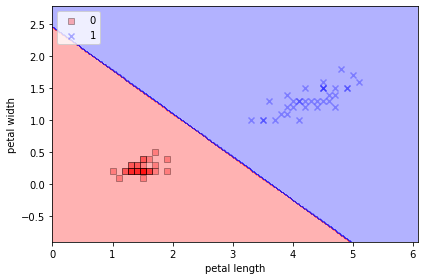

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(n_iter=1000, eta=0.05, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()